In [17]:
import torch
import torch.nn.functional as F

In [18]:
scores = torch.rand(10)
tk = scores.topk(5).indices

In [19]:
w = torch.tensor([1/(k+1) for k in range(5)], dtype=torch.float32, requires_grad=True)

s = F.softmax(w, dim=0)
ls = F.log_softmax(w, dim=0)
w,s,ls

(tensor([1.0000, 0.5000, 0.3333, 0.2500, 0.2000], requires_grad=True),
 tensor([0.3288, 0.1994, 0.1688, 0.1553, 0.1477], grad_fn=<SoftmaxBackward0>),
 tensor([-1.1124, -1.6124, -1.7791, -1.8624, -1.9124],
        grad_fn=<LogSoftmaxBackward0>))

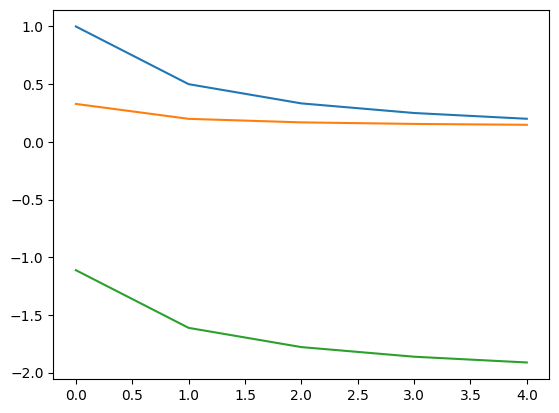

In [20]:
import matplotlib.pyplot as plt

plt.plot(w.detach().numpy(), label='w')
plt.plot(s.detach().numpy(), label='s')
plt.plot(ls.detach().numpy(), label='ls')

In [23]:
w, scores, scores[tk], scores[tk] * w, scores[tk] * s, scores[tk] * ls

(tensor([1.0000, 0.5000, 0.3333, 0.2500, 0.2000], requires_grad=True),
 tensor([0.9205, 0.1195, 0.4207, 0.6318, 0.1963, 0.6741, 0.1797, 0.6193, 0.7459,
         0.0239]),
 tensor([0.9205, 0.7459, 0.6741, 0.6318, 0.6193]),
 tensor([0.9205, 0.3729, 0.2247, 0.1580, 0.1239], grad_fn=<MulBackward0>),
 tensor([0.3026, 0.1487, 0.1138, 0.0981, 0.0915], grad_fn=<MulBackward0>),
 tensor([-1.0239, -1.2026, -1.1992, -1.1767, -1.1844], grad_fn=<MulBackward0>))

In [25]:
lscores = torch.zeros_like(scores)
lscores[tk] = scores[tk] * ls

In [26]:
lscores

tensor([-1.0239,  0.0000,  0.0000, -1.1767,  0.0000, -1.1992,  0.0000, -1.1844,
        -1.2026,  0.0000], grad_fn=<IndexPutBackward0>)

In [ ]:
scores[tk] = scores[tk] * w

In [28]:
scores = torch.rand(10)
tk = scores.topk(5).indices

w = torch.tensor([1/(k+1) for k in range(5)], dtype=torch.float32, requires_grad=True)
ls = F.log_softmax(w, dim=0)

lscores = torch.zeros_like(scores)
lscores[tk] = scores[tk] * ls
scores, lscores

(tensor([0.2354, 0.6039, 0.3375, 0.7665, 0.7575, 0.3047, 0.1899, 0.9926, 0.5916,
         0.6377]),
 tensor([ 0.0000, -1.1550,  0.0000, -1.2360, -1.3476,  0.0000,  0.0000, -1.1042,
          0.0000, -1.1876], grad_fn=<IndexPutBackward0>))

In [30]:
label = torch.tensor([3])
criterion = torch.nn.NLLLoss()

loss = criterion(lscores.unsqueeze(0), label)
loss

tensor(1.2360, grad_fn=<NllLossBackward0>)

In [31]:
torch.nn.CrossEntropyLoss()(scores.unsqueeze(0), label)

tensor(2.1095)

In [9]:
with open("out/official/20241230_225438/predictions.csv", "r") as f:
    lines = f.readlines()
    sorted_lines = [lines[0]] + sorted(lines[1:], key=lambda x: x.split(",")[0])
    out = open("out/official/20241230_225438/predictions_sorted.csv", "w")
    out.writelines(sorted_lines)
    out.close()
    

In [9]:
lines = string.split("\n")[2:]
ids = [line.split(",")[0] for line in lines if line]
set(ids)

{'015feb78.jpg',
 '1b1cb42a.jpg',
 '1bb5fbe9.jpg',
 '2087ab41.jpg',
 '24f6dcbc.jpg',
 '305d1b35.jpg',
 '3a88e5ef.jpg',
 '3f4e9298.jpg',
 '5a4adfa7.jpg',
 '6d071aa8.jpg',
 '781377a0.jpg',
 '8061d124.jpg',
 'bb4a8f50.jpg',
 'bc18ebce.jpg',
 'd23113d9.jpg',
 'ec4866fa.jpg'}

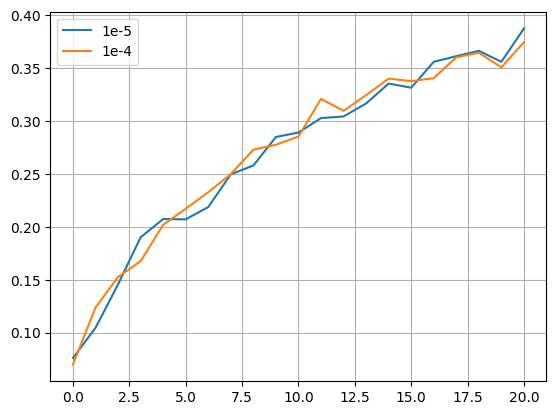

In [2]:
v1 = [
        0.07604498416185379,
        0.10456261783838272,
        0.14569273591041565,
        0.19009898602962494,
        0.20735259354114532,
        0.2070314735174179,
        0.218670055270195,
        0.24960772693157196,
        0.2579210698604584,
        0.2848547399044037,
        0.2890629172325134,
        0.3027104437351227,
        0.3042353689670563,
        0.3165213465690613,
        0.33531108498573303,
        0.3314245045185089,
        0.3558604121208191,
        0.3612196147441864,
        0.3662866950035095,
        0.3559005856513977,
        0.38739240169525146
    ]

v2 = [
        0.06988752633333206,
        0.1237620860338211,
        0.15255458652973175,
        0.1674702763557434,
        0.20187221467494965,
        0.21703679859638214,
        0.23265865445137024,
        0.24979031085968018,
        0.2728385627269745,
        0.27750009298324585,
        0.285277396440506,
        0.3208503723144531,
        0.30952364206314087,
        0.32433685660362244,
        0.3400312066078186,
        0.3376306891441345,
        0.3404051661491394,
        0.36010029911994934,
        0.36443614959716797,
        0.3506524860858917,
        0.3743954002857208
    ]

import matplotlib.pyplot as plt

plt.plot(v1)
plt.plot(v2)
plt.grid()
plt.legend(["1e-5", "1e-4"])

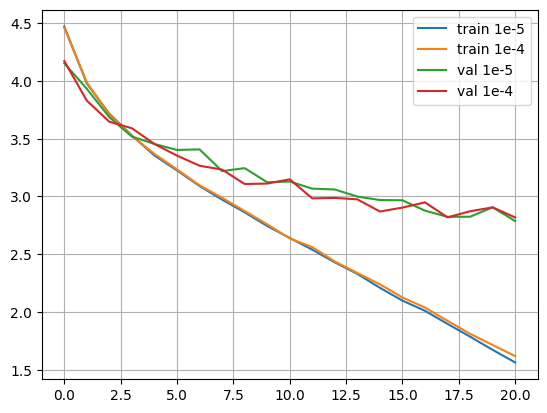

In [5]:
train_losses1 = [
        4.4712112520443705,
        3.978086848102829,
        3.7152278729590122,
        3.5273578383159876,
        3.3547287587855266,
        3.22527598493946,
        3.090318760883898,
        2.972516169776244,
        2.862917459281326,
        2.744655047916345,
        2.6406436428915643,
        2.539496624199509,
        2.42970525407671,
        2.329745886007544,
        2.2095151887432456,
        2.0984824655638534,
        2.0103318829380297,
        1.8967572762924116,
        1.7864145313762598,
        1.672578717058792,
        1.563102173865292
    ]
val_losses1 = [
    4.1526833118352675,
    3.931865364089048,
    3.6855197938761317,
    3.5180778395860717,
    3.454405691390647,
    3.402655868601978,
    3.407393987913777,
    3.219123281034312,
    3.2451847782708647,
    3.1229889572114873,
    3.1293954132194806,
    3.0677109553401634,
    3.0602846127703676,
    2.9989108411889327,
    2.9690726690722586,
    2.9668556227719876,
    2.877109056128595,
    2.823608156433679,
    2.8246182427370456,
    2.9061669595259474,
    2.7869775510372077
]

train_losses2 = [
        4.4599807947048316,
        3.986899143502454,
        3.707446957114962,
        3.523490933987596,
        3.3681379103240197,
        3.2339829581810786,
        3.0962501563113043,
        2.9883406312399607,
        2.873989565846902,
        2.75866896980055,
        2.6366450600419897,
        2.561292794549495,
        2.4368942630681345,
        2.337043546309099,
        2.2397296906118127,
        2.1254013611627767,
        2.038106669406747,
        1.9227761144301754,
        1.8110154131497784,
        1.7143884335717265,
        1.6181304490836501
    ]

val_losses2 = [
        4.171756860905123,
        3.8293172829133226,
        3.64642610227255,
        3.5901844609052613,
        3.454080515338066,
        3.353397944816073,
        3.26593544070882,
        3.232415426942639,
        3.1078176821084846,
        3.1115775699902297,
        3.148191079161221,
        2.983414275305612,
        2.987445383143604,
        2.974838964921191,
        2.869559727217022,
        2.9037389853843174,
        2.9487596839890444,
        2.8188961484378443,
        2.871830513602809,
        2.9057451791333078,
        2.81833116990283
    ]

plt.plot(train_losses1, label="train 1e-5")
plt.plot(train_losses2, label="train 1e-4")
plt.plot(val_losses1, label="val 1e-5")
plt.plot(val_losses2, label="val 1e-4")
plt.legend()
plt.grid()

In [48]:
from sklearn.model_selection import train_test_split

X = list(range(10))
y = list(range(3)) * 3 + [2]
X_train, X_test = train_test_split(
    X, test_size=0.4, random_state=42, shuffle=True, stratify=None
    )

X_train, X_test

([7, 2, 9, 4, 3, 6], [8, 1, 5, 0])

In [54]:
from torchvision.datasets import VisionDataset
from torch.utils.data import Subset
import torch

class MyDataset(VisionDataset):
    def __init__(self, root="", transform=None, target_transform=None):
        super(MyDataset, self).__init__(root, transform=transform, target_transform=target_transform)

        self.x = torch.rand(10)
        self.y = torch.randint(0, 3, (10,))
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return len(self.x)
        
        
mydataset = MyDataset("")

subset = Subset(mydataset, list(range(5)))

isinstance(mydataset, Subset)

False

### Best configuration for random backbone up to now

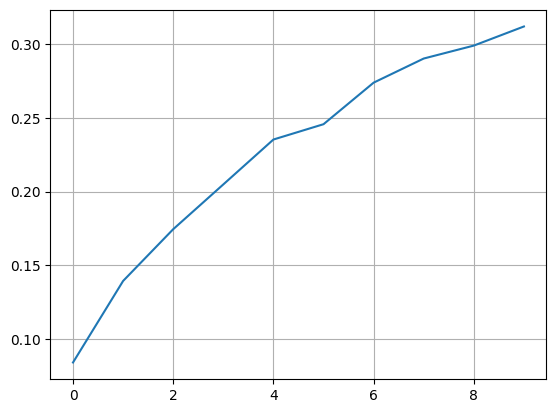

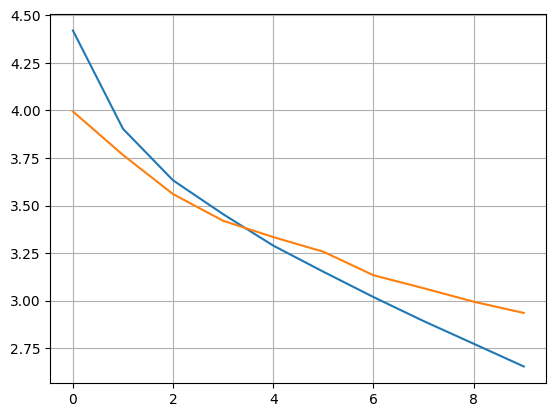

In [4]:
val_accuracies = [
    0.08419206738471985,
    0.1394469290971756,
    0.17452268302440643,
    0.2048742026090622,
    0.23529750108718872,
    0.24567946791648865,
    0.2738375961780548,
    0.2901918590068817,
    0.298961341381073,
    0.31191524863243103
]

train_losses = [
    4.420879250456547,
    3.903659423877453,
    3.632515722821499,
    3.454458996139724,
    3.289269699104901,
    3.151839817392415,
    3.018707375588088,
    2.892420737393971,
    2.773215157204661,
    2.6536322151278626
]

val_losses = [
    3.9949151563644407,
    3.7660061812400816,
    3.560041229724884,
    3.4198405504226685,
    3.334247932434082,
    3.2572472620010378,
    3.1334413290023804,
    3.0652887058258056,
    2.994322199821472,
    2.935179829597473
]

import matplotlib.pyplot as plt

plt.figure()
plt.plot(val_accuracies)
plt.grid()

plt.figure()
plt.plot(train_losses)
plt.plot(val_losses)
plt.grid()

### Custom plot for config

In [60]:
import json
PATH= lambda cfg: f"out/official/{cfg}/result.json"
CFG = "20250107_161635"
fin = open(PATH(CFG), mode="r", encoding="utf-8")
result = json.load(fin)

train_losses, val_losses, val_accuracies = map(result.get, ["train_losses", "val_losses", "val_accuracies"])

train_losses, val_losses, val_accuracies

([4.410600761401242,
  3.903098978872957,
  3.6547785704505853,
  3.462937884289643,
  3.3036755785859864,
  3.1603856996215622,
  3.0350392738292955,
  2.911855239292671,
  2.7891539160547585,
  2.6663533402927992,
  2.5435597179778693,
  2.4408044517040253,
  2.341465444400393,
  2.222822291840767],
 [4.081306798458099,
  3.7705239725112913,
  3.5889788365364073,
  3.4426308035850526,
  3.335531704425812,
  3.2492643117904665,
  3.1736767625808717,
  3.0687943387031553,
  3.0263093662261964,
  2.984197404384613,
  2.8761298298835754,
  2.8669380211830138,
  2.8576572835445404,
  2.758475309610367],
 [0.09291042387485504,
  0.12939222157001495,
  0.1748776137828827,
  0.20607900619506836,
  0.22901120781898499,
  0.2530072033405304,
  0.26732879877090454,
  0.2988360524177551,
  0.2945624589920044,
  0.32478854060173035,
  0.33495208621025085,
  0.3402288854122162,
  0.34832873940467834,
  0.36750510334968567])

In [23]:
train_losses = [
    4.426035417564984,
    3.9249098352317153,
    3.6724167383950332,
    3.472135620384381,
    3.3127809136078277,
    3.173696221976445,
    3.0450885198239623,
    2.9120668522242843,
    2.802133045833686,
    2.6796454792392663,
    2.5715141460813324,
    2.457955703139305,
    2.349190111561068,
    2.246277039421016
]
val_losses = [
    4.0576200199127195,
    3.750187599658966,
    3.6170818495750425,
    3.47578813791275,
    3.374278621673584,
    3.320884954929352,
    3.3632968711853026,
    3.1140793657302854,
    2.996187597513199,
    2.9600464129447936,
    2.966615837812424,
    2.911357126235962,
    2.8560305047035217,
    2.7559532725811007
]
val_accuracies = [
    0.08551990985870361,
    0.14993029832839966,
    0.1658024787902832,
    0.1906375139951706,
    0.22807137668132782,
    0.2441190928220749,
    0.248162642121315,
    0.28240033984184265,
    0.30268606543540955,
    0.3153406083583832,
    0.32531553506851196,
    0.3358810842037201,
    0.344297856092453,
    0.36870697140693665
]

In [61]:
trn_losses = train_losses
vld_losses = val_losses
vld_acc = val_accuracies

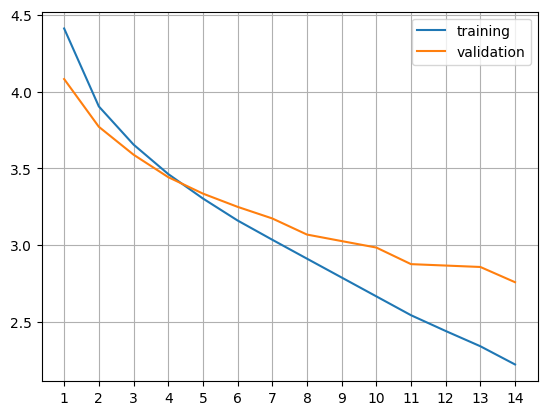

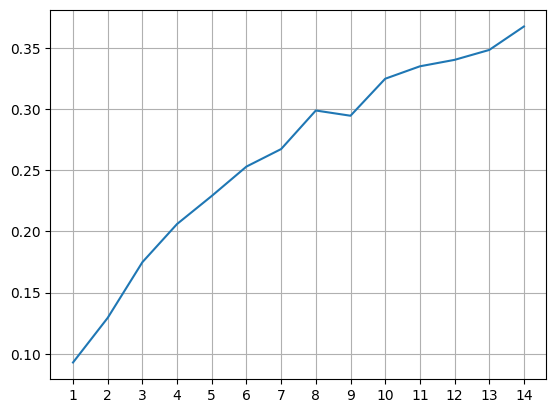

In [62]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(trn_losses, label="training")
plt.plot(vld_losses, label="validation")
plt.xticks(range(0, len(trn_losses)), range(1, len(trn_losses)+1))
plt.grid()
plt.legend()

plt.figure()
plt.plot(vld_acc)
plt.xticks(range(0, len(trn_losses)), range(1, len(trn_losses)+1))
plt.grid()

In [1]:
import torch

In [44]:
class NN(torch.nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.conv = torch.nn.Conv2d(3, 10, 3, padding=1)
        self.bn = torch.nn.BatchNorm2d(10)
        self.fc = torch.nn.Linear(1000, 3)
        
    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

In [45]:
model = NN()

In [46]:
model.state_dict()

OrderedDict([('conv.weight',
              tensor([[[[-9.2833e-02,  1.4356e-01,  1.2191e-01],
                        [ 1.4582e-01,  1.6265e-01, -9.2503e-02],
                        [-7.3105e-02, -2.3486e-02,  1.0550e-01]],
              
                       [[-1.6739e-01,  6.7233e-02,  4.3757e-02],
                        [ 5.5504e-02,  4.1471e-02,  1.7050e-01],
                        [ 6.9754e-02,  9.9653e-02, -1.8673e-02]],
              
                       [[-1.6309e-01,  8.9201e-02,  1.4026e-01],
                        [ 9.0020e-02, -1.5762e-01,  5.9663e-03],
                        [-9.0651e-02,  1.3105e-02,  1.6039e-01]]],
              
              
                      [[[-1.0246e-01,  1.2639e-01, -1.3531e-01],
                        [-1.2633e-02, -1.4324e-01,  1.4916e-01],
                        [-1.1672e-01, -8.0923e-02,  2.9275e-02]],
              
                       [[-2.7000e-02,  1.5322e-01, -6.0501e-02],
                        [ 1.6221e-02, -8.2762e

In [47]:
model.bn.running_mean, model.bn.running_var

(tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [48]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
optimizer.zero_grad()

In [49]:
optimizer.state_dict()

{'state': {},
 'param_groups': [{'lr': 0.001,
   'betas': (0.9, 0.999),
   'eps': 1e-08,
   'weight_decay': 0,
   'amsgrad': False,
   'maximize': False,
   'foreach': None,
   'capturable': False,
   'differentiable': False,
   'fused': None,
   'params': [0, 1, 2, 3, 4, 5]}]}

In [51]:
x = torch.rand(1, 3, 10, 10)
y = torch.tensor([1])
out = model(x)
print(out.shape, y.shape)
loss = criterion(out, y)
loss.backward()
optimizer.step()

torch.Size([1, 3]) torch.Size([1])


In [52]:
model.state_dict()

OrderedDict([('conv.weight',
              tensor([[[[-0.0918,  0.1446,  0.1209],
                        [ 0.1468,  0.1616, -0.0915],
                        [-0.0741, -0.0245,  0.1045]],
              
                       [[-0.1684,  0.0682,  0.0428],
                        [ 0.0545,  0.0425,  0.1695],
                        [ 0.0688,  0.1007, -0.0197]],
              
                       [[-0.1621,  0.0882,  0.1413],
                        [ 0.0890, -0.1586,  0.0070],
                        [-0.0897,  0.0121,  0.1614]]],
              
              
                      [[[-0.1035,  0.1274, -0.1343],
                        [-0.0116, -0.1422,  0.1482],
                        [-0.1177, -0.0819,  0.0303]],
              
                       [[-0.0280,  0.1522, -0.0595],
                        [ 0.0172, -0.0818,  0.0631],
                        [-0.1895, -0.1733,  0.1712]],
              
                       [[ 0.1424, -0.0436, -0.1578],
                        [-0

In [53]:
model.bn.running_mean, model.bn.running_var

(tensor([ 0.0751, -0.0462, -0.0444,  0.0294,  0.0403,  0.0582,  0.0365,  0.0112,
         -0.0779, -0.0345]),
 tensor([0.8157, 0.8165, 0.8150, 0.8178, 0.8175, 0.8174, 0.8217, 0.8165, 0.8164,
         0.8171]))

In [54]:
optimizer.state_dict()

{'state': {0: {'step': tensor(1.),
   'exp_avg': tensor([[[[-1.4297e-02, -2.1235e-02,  9.8912e-03],
             [-3.7139e-02,  2.8826e-02, -2.1155e-02],
             [ 3.6793e-02,  2.7827e-02,  7.1255e-03]],
   
            [[ 3.0982e-02, -3.7584e-02,  1.7329e-02],
             [ 1.0489e-02, -2.6427e-02,  4.0161e-02],
             [ 5.9276e-02, -1.1600e-02,  3.8638e-02]],
   
            [[-1.9663e-02,  3.4629e-02, -1.0414e-02],
             [ 1.3431e-02,  2.1847e-02, -1.7682e-02],
             [-1.3552e-02,  7.1592e-04, -2.1781e-02]]],
   
   
           [[[ 3.2782e-02, -2.4704e-02, -1.3275e-02],
             [-2.1319e-02, -2.9184e-02,  1.7773e-02],
             [ 5.0788e-02,  2.4496e-03, -1.3255e-04]],
   
            [[ 4.5405e-03,  1.1221e-02, -2.9921e-02],
             [-2.7379e-02, -2.5160e-02, -2.4331e-02],
             [ 4.3626e-03,  5.1778e-03,  3.1339e-02]],
   
            [[ 3.6783e-03,  1.7475e-02,  1.2398e-02],
             [ 1.1592e-02,  4.3376e-02,  6.4287e-02],
      

In [55]:
chp = {
    "model": model.state_dict(),
    "optimizer": optimizer.state_dict(),
}
torch.save(chp, "model.pth.tar")

In [56]:
new_model = NN()
new_model.bn.running_mean, new_model.bn.running_var

(tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [57]:
new_optimizer = torch.optim.Adam(new_model.parameters(), lr=1e-3)
new_optimizer.state_dict()

{'state': {},
 'param_groups': [{'lr': 0.001,
   'betas': (0.9, 0.999),
   'eps': 1e-08,
   'weight_decay': 0,
   'amsgrad': False,
   'maximize': False,
   'foreach': None,
   'capturable': False,
   'differentiable': False,
   'fused': None,
   'params': [0, 1, 2, 3, 4, 5]}]}

In [58]:
loaded_chp = torch.load("model.pth.tar", weights_only=True)
new_model.load_state_dict(loaded_chp["model"])
new_model.bn.running_mean, new_model.bn.running_var

(tensor([ 0.0751, -0.0462, -0.0444,  0.0294,  0.0403,  0.0582,  0.0365,  0.0112,
         -0.0779, -0.0345]),
 tensor([0.8157, 0.8165, 0.8150, 0.8178, 0.8175, 0.8174, 0.8217, 0.8165, 0.8164,
         0.8171]))

In [59]:
new_optimizer.load_state_dict(loaded_chp["optimizer"])
new_optimizer.state_dict()

{'state': {0: {'step': tensor(1.),
   'exp_avg': tensor([[[[-1.4297e-02, -2.1235e-02,  9.8912e-03],
             [-3.7139e-02,  2.8826e-02, -2.1155e-02],
             [ 3.6793e-02,  2.7827e-02,  7.1255e-03]],
   
            [[ 3.0982e-02, -3.7584e-02,  1.7329e-02],
             [ 1.0489e-02, -2.6427e-02,  4.0161e-02],
             [ 5.9276e-02, -1.1600e-02,  3.8638e-02]],
   
            [[-1.9663e-02,  3.4629e-02, -1.0414e-02],
             [ 1.3431e-02,  2.1847e-02, -1.7682e-02],
             [-1.3552e-02,  7.1592e-04, -2.1781e-02]]],
   
   
           [[[ 3.2782e-02, -2.4704e-02, -1.3275e-02],
             [-2.1319e-02, -2.9184e-02,  1.7773e-02],
             [ 5.0788e-02,  2.4496e-03, -1.3255e-04]],
   
            [[ 4.5405e-03,  1.1221e-02, -2.9921e-02],
             [-2.7379e-02, -2.5160e-02, -2.4331e-02],
             [ 4.3626e-03,  5.1778e-03,  3.1339e-02]],
   
            [[ 3.6783e-03,  1.7475e-02,  1.2398e-02],
             [ 1.1592e-02,  4.3376e-02,  6.4287e-02],
      

In [40]:
from torch.utils.data import DataLoader, Dataset

class MyDataset(Dataset):
    def __init__(self, dim):
        super().__init__()
        self.x = torch.arange(dim)
        
    def __getitem__(self, index):
        return self.x[index]
    
    def __len__(self):
        return len(self.x)
    
dataset = MyDataset(10)

dataloader = DataLoader(dataset, batch_size=3, shuffle=True, drop_last=False)

for i in range(5):
    for x in dataloader:
        print(x, end = " ")
    print()

tensor([9, 3, 2]) tensor([5, 4, 1]) tensor([8, 7, 0]) tensor([6]) 
tensor([8, 2, 1]) tensor([4, 9, 7]) tensor([5, 6, 3]) tensor([0]) 
tensor([9, 7, 6]) tensor([0, 1, 8]) tensor([4, 2, 3]) tensor([5]) 
tensor([8, 3, 7]) tensor([2, 1, 5]) tensor([6, 9, 0]) tensor([4]) 
tensor([1, 6, 8]) tensor([4, 9, 5]) tensor([7, 3, 2]) tensor([0]) 


In [63]:
import os

In [83]:
!git clone https://github.com/MicheleCazzola/os161-vm

Cloning into 'os161-vm'...
Updating files:  39% (840/2104)
Updating files:  40% (842/2104)
Updating files:  41% (863/2104)
Updating files:  42% (884/2104)
Updating files:  43% (905/2104)
Updating files:  44% (926/2104)
Updating files:  45% (947/2104)
Updating files:  46% (968/2104)
Updating files:  47% (989/2104)
Updating files:  48% (1010/2104)
Updating files:  49% (1031/2104)
Updating files:  50% (1052/2104)
Updating files:  51% (1074/2104)
Updating files:  52% (1095/2104)
Updating files:  53% (1116/2104)
Updating files:  54% (1137/2104)
Updating files:  55% (1158/2104)
Updating files:  56% (1179/2104)
Updating files:  57% (1200/2104)
Updating files:  58% (1221/2104)
Updating files:  59% (1242/2104)
Updating files:  60% (1263/2104)
Updating files:  61% (1284/2104)
Updating files:  62% (1305/2104)
Updating files:  63% (1326/2104)
Updating files:  64% (1347/2104)
Updating files:  65% (1368/2104)
Updating files:  66% (1389/2104)
Updating files:  67% (1410/2104)
Updating files:  68% (143

In [92]:
os.listdir("os161-vm")

['.git', '.gitignore', 'kern', 'README.md', 'README_it.md']

In [ ]:
prev = None
i = 1
while i > 0:
    !git clone https://github.com/MicheleCazzola/os161-vm
    
    dirs = os.listdir("os161-vm")
    if prev is not None and dirs != prev:
        !rm -rf os161-vm
        raise Exception(f"Different contents - Now:{dirs}, Before: {prev}")
    
    if i % 10 == 0:
        print(f"Iteration {i}: OK")
        
    !rm -rf os161-vm

Cloning into 'os161-vm'...
Updating files:  43% (924/2104)
Updating files:  44% (926/2104)
Updating files:  45% (947/2104)
Updating files:  46% (968/2104)
Updating files:  47% (989/2104)
Updating files:  48% (1010/2104)
Updating files:  49% (1031/2104)
Updating files:  50% (1052/2104)
Updating files:  51% (1074/2104)
Updating files:  52% (1095/2104)
Updating files:  53% (1116/2104)
Updating files:  54% (1137/2104)
Updating files:  55% (1158/2104)
Updating files:  56% (1179/2104)
Updating files:  57% (1200/2104)
Updating files:  58% (1221/2104)
Updating files:  59% (1242/2104)
Updating files:  60% (1263/2104)
Updating files:  61% (1284/2104)
Updating files:  62% (1305/2104)
Updating files:  63% (1326/2104)
Updating files:  64% (1347/2104)
Updating files:  65% (1368/2104)
Updating files:  66% (1389/2104)
Updating files:  67% (1410/2104)
Updating files:  68% (1431/2104)
Updating files:  69% (1452/2104)
Updating files:  70% (1473/2104)
Updating files:  71% (1494/2104)
Updating files:  72% 

^C


Cloning into 'os161-vm'...
Updating files:  32% (680/2104)
Updating files:  33% (695/2104)
Updating files:  34% (716/2104)
Updating files:  35% (737/2104)
Updating files:  36% (758/2104)
Updating files:  37% (779/2104)
Updating files:  38% (800/2104)
Updating files:  39% (821/2104)
Updating files:  40% (842/2104)
Updating files:  41% (863/2104)
Updating files:  42% (884/2104)
Updating files:  43% (905/2104)
Updating files:  44% (926/2104)
Updating files:  45% (947/2104)
Updating files:  46% (968/2104)
Updating files:  47% (989/2104)
Updating files:  48% (1010/2104)
Updating files:  49% (1031/2104)
Updating files:  50% (1052/2104)
Updating files:  51% (1074/2104)
Updating files:  52% (1095/2104)
Updating files:  53% (1116/2104)
Updating files:  54% (1137/2104)
Updating files:  55% (1158/2104)
Updating files:  56% (1179/2104)
Updating files:  57% (1200/2104)
Updating files:  58% (1221/2104)
Updating files:  59% (1242/2104)
Updating files:  60% (1263/2104)
Updating files:  61% (1284/2104)

^C


rm: cannot remove 'os161-vm/.git/objects/pack/tmp_pack_b61Oj1': Device or resource busy
fatal: destination path 'os161-vm' already exists and is not an empty directory.
rm: cannot remove 'os161-vm/.git/objects/pack/tmp_pack_b61Oj1': Device or resource busy
fatal: destination path 'os161-vm' already exists and is not an empty directory.
rm: cannot remove 'os161-vm/.git/objects/pack/tmp_pack_b61Oj1': Device or resource busy
fatal: destination path 'os161-vm' already exists and is not an empty directory.
rm: cannot remove 'os161-vm/.git/objects/pack/tmp_pack_b61Oj1': Device or resource busy
fatal: destination path 'os161-vm' already exists and is not an empty directory.
rm: cannot remove 'os161-vm/.git/objects/pack/tmp_pack_b61Oj1': Device or resource busy
fatal: destination path 'os161-vm' already exists and is not an empty directory.
rm: cannot remove 'os161-vm/.git/objects/pack/tmp_pack_b61Oj1': Device or resource busy
fatal: destination path 'os161-vm' already exists and is not an emp

In [1]:
a = {'dante-gabriel-rossetti': 0, 'jan-van-eyck': 1, 'francisco-de-zurbaran': 2, 'william-shayer': 3, 'martiros-saryan': 4, 'fyodor-vasilyev': 5, 'edwin-henry-landseer': 6, 'giovanni-boldini': 7, 'frans-hals': 8, 'caspar-david-friedrich': 9, 'thomas-cole': 10, 'nikolay-bogdanov-belsky': 11, 'lorenzo-lotto': 12, 'benozzo-gozzoli': 13, 'peter-paul-rubens': 14, 'maurice-quentin-de-la-tour': 15, 'hans-holbein-the-younger': 16, 'theodore-gericault': 17, 'maerten-van-heemskerck': 18, 'ivan-shishkin': 19, 'henri-fantin-latour': 20, 'james-mcneill-whistler': 21, 'anders-zorn': 22, 'eugene-delacroix': 23, 'julius-leblanc-stewart': 24, 'giorgio-vasari': 25, 'thomas-eakins': 26, 'john-crome': 27, 'albrecht-durer': 28, 'bartolome-esteban-murillo': 29, 'thomas-gainsborough': 30, 'paolo-veronese': 31, 'pieter-de-hooch': 32, 'rembrandt': 33, 'george-morland': 34, 'albrecht-altdorfer': 35, 'pieter-bruegel-the-elder': 36, 'winslow-homer': 37, 'viktor-vasnetsov': 38, 'john-french-sloan': 39, 'jan-steen': 40, 'andrei-ryabushkin': 41, 'n.c.-wyeth': 42, 'giovanni-battista-tiepolo': 43, 'jacob-jordaens': 44, 'boris-kustodiev': 45, 'salvador-dali': 46, 'antoine-watteau': 47, 'anthony-van-dyck': 48, 'william-adolphe-bouguereau': 49, 'mabuse': 50, 'hans-memling': 51, 'el-greco': 52, 'andrea-del-sarto': 53, 'jean-honore-fragonard': 54, 'ivan-kramskoy': 55, 'titian': 56, 'charles-francois-daubigny': 57, 'lev-lagorio': 58, 'pietro-longhi': 59, 'vasily-polenov': 60, 'gustave-dore': 61, 'orest-kiprensky': 62, 'karl-bodmer': 63, 'agnolo-bronzino': 64, 'bernardo-bellotto': 65, 'george-stubbs': 66, 'correggio': 67, 'john-singer-sargent': 68, 'jacopo-pontormo': 69, 'benjamin-west': 70, 'camille-pissarro': 71, 'volodymyr-orlovsky': 72, 'pavel-svinyin': 73, 'valentin-serov': 74, 'esaias-van-de-velde': 75, 'ivan-vladimirov': 76, 'jan-matejko': 77, 'tintoretto': 78, 'alexey-venetsianov': 79, 'paul-cezanne': 80, 'cornelis-springer': 81, 'pyotr-konchalovsky': 82, 'sir-lawrence-alma-tadema': 83, 'john-hoppner': 84, 'vincent-van-gogh': 85, 'jean-baptiste-simeon-chardin': 86, 'francesco-guardi': 87, 'paolo-uccello': 88, 'rogier-van-der-weyden': 89, 'diego-velazquez': 90, 'francisco-goya': 91, 'piero-della-francesca': 92, 'vladimir-makovsky': 93, 'rudolf-von-alt': 94, 'giovanni-bellini': 95, 'louise-elisabeth-vigee-le-brun': 96, 'raphael': 97, 'john-constable': 98, 'edouard-manet': 99, 'karl-bryullov': 100, 'david-teniers-the-younger': 101, 'domenico-ghirlandaio': 102, 'vasily-surikov': 103, 'guido-reni': 104, 'gerard-david': 105, 'alfred-stevens': 106, 'antoine-pesne': 107, 'john-atkinson-grimshaw': 108, 'filippo-lippi': 109, 'canaletto': 110, 'vittore-carpaccio': 111, 'pietro-perugino': 112, 'carlo-crivelli': 113, 'frans-snyders': 114, 'gerrit-dou': 115, 'william-hogarth': 116, 'giovanni-domenico-tiepolo': 117, 'john-william-waterhouse': 118, 'gian-lorenzo-bernini': 119, 'dmitry-levitzky': 120, 'konstantin-makovsky': 121, 'camille-corot': 122, 'joseph-wright': 123, 'joshua-reynolds': 124, 'luca-signorelli': 125, 'edward-burne-jones': 126, 'gustave-courbet': 127, 'vasily-perov': 128, 'ilya-repin': 129, 'nicholas-roerich': 130, 'eugene-boudin': 131, 'james-tissot': 132, 'nikolai-ge': 133, 'vladimir-borovikovsky': 134, 'odilon-redon': 135, 'johan-hendrik-weissenbruch': 136, 'taras-shevchenko': 137, 'leonardo-da-vinci': 138, 'isaac-levitan': 139, 'william-turner': 140, 'adriaen-van-ostade': 141, 'jean-francois-millet': 142, 'jean-fouquet': 143, 'vasily-vereshchagin': 144, 'aleksey-savrasov': 145, 'sandro-botticelli': 146, 'fyodor-bronnikov': 147, 'henry-raeburn': 148, 'hieronymus-bosch': 149, 'edward-hopper': 150, 'vasily-tropinin': 151, 'john-everett-millais': 152, 'arkhip-kuindzhi': 153, 'theodore-rousseau': 154, 'andrea-mantegna': 155, 'caravaggio': 156, 'martin-schongauer': 157, 'michelangelo': 158, 'fra-angelico': 159, 'ivan-aivazovsky': 160}

In [2]:

b = {'dante-gabriel-rossetti': 0, 'jan-van-eyck': 1, 'francisco-de-zurbaran': 2, 'william-shayer': 3, 'martiros-saryan': 4, 'fyodor-vasilyev': 5, 'edwin-henry-landseer': 6, 'giovanni-boldini': 7, 'frans-hals': 8, 'caspar-david-friedrich': 9, 'thomas-cole': 10, 'nikolay-bogdanov-belsky': 11, 'lorenzo-lotto': 12, 'benozzo-gozzoli': 13, 'peter-paul-rubens': 14, 'maurice-quentin-de-la-tour': 15, 'hans-holbein-the-younger': 16, 'theodore-gericault': 17, 'maerten-van-heemskerck': 18, 'ivan-shishkin': 19, 'henri-fantin-latour': 20, 'james-mcneill-whistler': 21, 'anders-zorn': 22, 'eugene-delacroix': 23, 'julius-leblanc-stewart': 24, 'giorgio-vasari': 25, 'thomas-eakins': 26, 'john-crome': 27, 'albrecht-durer': 28, 'bartolome-esteban-murillo': 29, 'thomas-gainsborough': 30, 'paolo-veronese': 31, 'pieter-de-hooch': 32, 'rembrandt': 33, 'george-morland': 34, 'albrecht-altdorfer': 35, 'pieter-bruegel-the-elder': 36, 'winslow-homer': 37, 'viktor-vasnetsov': 38, 'john-french-sloan': 39, 'jan-steen': 40, 'andrei-ryabushkin': 41, 'n.c.-wyeth': 42, 'giovanni-battista-tiepolo': 43, 'jacob-jordaens': 44, 'boris-kustodiev': 45, 'salvador-dali': 46, 'antoine-watteau': 47, 'anthony-van-dyck': 48, 'william-adolphe-bouguereau': 49, 'mabuse': 50, 'hans-memling': 51, 'el-greco': 52, 'andrea-del-sarto': 53, 'jean-honore-fragonard': 54, 'ivan-kramskoy': 55, 'titian': 56, 'charles-francois-daubigny': 57, 'lev-lagorio': 58, 'pietro-longhi': 59, 'vasily-polenov': 60, 'gustave-dore': 61, 'orest-kiprensky': 62, 'karl-bodmer': 63, 'agnolo-bronzino': 64, 'bernardo-bellotto': 65, 'george-stubbs': 66, 'correggio': 67, 'john-singer-sargent': 68, 'jacopo-pontormo': 69, 'benjamin-west': 70, 'camille-pissarro': 71, 'volodymyr-orlovsky': 72, 'pavel-svinyin': 73, 'valentin-serov': 74, 'esaias-van-de-velde': 75, 'ivan-vladimirov': 76, 'jan-matejko': 77, 'tintoretto': 78, 'alexey-venetsianov': 79, 'paul-cezanne': 80, 'cornelis-springer': 81, 'pyotr-konchalovsky': 82, 'sir-lawrence-alma-tadema': 83, 'john-hoppner': 84, 'vincent-van-gogh': 85, 'jean-baptiste-simeon-chardin': 86, 'francesco-guardi': 87, 'paolo-uccello': 88, 'rogier-van-der-weyden': 89, 'diego-velazquez': 90, 'francisco-goya': 91, 'piero-della-francesca': 92, 'vladimir-makovsky': 93, 'rudolf-von-alt': 94, 'giovanni-bellini': 95, 'louise-elisabeth-vigee-le-brun': 96, 'raphael': 97, 'john-constable': 98, 'edouard-manet': 99, 'karl-bryullov': 100, 'david-teniers-the-younger': 101, 'domenico-ghirlandaio': 102, 'vasily-surikov': 103, 'guido-reni': 104, 'gerard-david': 105, 'alfred-stevens': 106, 'antoine-pesne': 107, 'john-atkinson-grimshaw': 108, 'filippo-lippi': 109, 'canaletto': 110, 'vittore-carpaccio': 111, 'pietro-perugino': 112, 'carlo-crivelli': 113, 'frans-snyders': 114, 'gerrit-dou': 115, 'william-hogarth': 116, 'giovanni-domenico-tiepolo': 117, 'john-william-waterhouse': 118, 'gian-lorenzo-bernini': 119, 'dmitry-levitzky': 120, 'konstantin-makovsky': 121, 'camille-corot': 122, 'joseph-wright': 123, 'joshua-reynolds': 124, 'luca-signorelli': 125, 'edward-burne-jones': 126, 'gustave-courbet': 127, 'vasily-perov': 128, 'ilya-repin': 129, 'nicholas-roerich': 130, 'eugene-boudin': 131, 'james-tissot': 132, 'nikolai-ge': 133, 'vladimir-borovikovsky': 134, 'odilon-redon': 135, 'johan-hendrik-weissenbruch': 136, 'taras-shevchenko': 137, 'leonardo-da-vinci': 138, 'isaac-levitan': 139, 'william-turner': 140, 'adriaen-van-ostade': 141, 'jean-francois-millet': 142, 'jean-fouquet': 143, 'vasily-vereshchagin': 144, 'aleksey-savrasov': 145, 'sandro-botticelli': 146, 'fyodor-bronnikov': 147, 'henry-raeburn': 148, 'hieronymus-bosch': 149, 'edward-hopper': 150, 'vasily-tropinin': 151, 'john-everett-millais': 152, 'arkhip-kuindzhi': 153, 'theodore-rousseau': 154, 'andrea-mantegna': 155, 'caravaggio': 156, 'martin-schongauer': 157, 'michelangelo': 158, 'fra-angelico': 159, 'ivan-aivazovsky': 160}

In [3]:
c = {'dante-gabriel-rossetti': 0, 'jan-van-eyck': 1, 'francisco-de-zurbaran': 2, 'william-shayer': 3, 'martiros-saryan': 4, 'fyodor-vasilyev': 5, 'edwin-henry-landseer': 6, 'giovanni-boldini': 7, 'frans-hals': 8, 'caspar-david-friedrich': 9, 'thomas-cole': 10, 'nikolay-bogdanov-belsky': 11, 'lorenzo-lotto': 12, 'benozzo-gozzoli': 13, 'peter-paul-rubens': 14, 'maurice-quentin-de-la-tour': 15, 'hans-holbein-the-younger': 16, 'theodore-gericault': 17, 'maerten-van-heemskerck': 18, 'ivan-shishkin': 19, 'henri-fantin-latour': 20, 'james-mcneill-whistler': 21, 'anders-zorn': 22, 'eugene-delacroix': 23, 'julius-leblanc-stewart': 24, 'giorgio-vasari': 25, 'thomas-eakins': 26, 'john-crome': 27, 'albrecht-durer': 28, 'bartolome-esteban-murillo': 29, 'thomas-gainsborough': 30, 'paolo-veronese': 31, 'pieter-de-hooch': 32, 'rembrandt': 33, 'george-morland': 34, 'albrecht-altdorfer': 35, 'pieter-bruegel-the-elder': 36, 'winslow-homer': 37, 'viktor-vasnetsov': 38, 'john-french-sloan': 39, 'jan-steen': 40, 'andrei-ryabushkin': 41, 'n.c.-wyeth': 42, 'giovanni-battista-tiepolo': 43, 'jacob-jordaens': 44, 'boris-kustodiev': 45, 'salvador-dali': 46, 'antoine-watteau': 47, 'anthony-van-dyck': 48, 'william-adolphe-bouguereau': 49, 'mabuse': 50, 'hans-memling': 51, 'el-greco': 52, 'andrea-del-sarto': 53, 'jean-honore-fragonard': 54, 'ivan-kramskoy': 55, 'titian': 56, 'charles-francois-daubigny': 57, 'lev-lagorio': 58, 'pietro-longhi': 59, 'vasily-polenov': 60, 'gustave-dore': 61, 'orest-kiprensky': 62, 'karl-bodmer': 63, 'agnolo-bronzino': 64, 'bernardo-bellotto': 65, 'george-stubbs': 66, 'correggio': 67, 'john-singer-sargent': 68, 'jacopo-pontormo': 69, 'benjamin-west': 70, 'camille-pissarro': 71, 'volodymyr-orlovsky': 72, 'pavel-svinyin': 73, 'valentin-serov': 74, 'esaias-van-de-velde': 75, 'ivan-vladimirov': 76, 'jan-matejko': 77, 'tintoretto': 78, 'alexey-venetsianov': 79, 'paul-cezanne': 80, 'cornelis-springer': 81, 'pyotr-konchalovsky': 82, 'sir-lawrence-alma-tadema': 83, 'john-hoppner': 84, 'vincent-van-gogh': 85, 'jean-baptiste-simeon-chardin': 86, 'francesco-guardi': 87, 'paolo-uccello': 88, 'rogier-van-der-weyden': 89, 'diego-velazquez': 90, 'francisco-goya': 91, 'piero-della-francesca': 92, 'vladimir-makovsky': 93, 'rudolf-von-alt': 94, 'giovanni-bellini': 95, 'louise-elisabeth-vigee-le-brun': 96, 'raphael': 97, 'john-constable': 98, 'edouard-manet': 99, 'karl-bryullov': 100, 'david-teniers-the-younger': 101, 'domenico-ghirlandaio': 102, 'vasily-surikov': 103, 'guido-reni': 104, 'gerard-david': 105, 'alfred-stevens': 106, 'antoine-pesne': 107, 'john-atkinson-grimshaw': 108, 'filippo-lippi': 109, 'canaletto': 110, 'vittore-carpaccio': 111, 'pietro-perugino': 112, 'carlo-crivelli': 113, 'frans-snyders': 114, 'gerrit-dou': 115, 'william-hogarth': 116, 'giovanni-domenico-tiepolo': 117, 'john-william-waterhouse': 118, 'gian-lorenzo-bernini': 119, 'dmitry-levitzky': 120, 'konstantin-makovsky': 121, 'camille-corot': 122, 'joseph-wright': 123, 'joshua-reynolds': 124, 'luca-signorelli': 125, 'edward-burne-jones': 126, 'gustave-courbet': 127, 'vasily-perov': 128, 'ilya-repin': 129, 'nicholas-roerich': 130, 'eugene-boudin': 131, 'james-tissot': 132, 'nikolai-ge': 133, 'vladimir-borovikovsky': 134, 'odilon-redon': 135, 'johan-hendrik-weissenbruch': 136, 'taras-shevchenko': 137, 'leonardo-da-vinci': 138, 'isaac-levitan': 139, 'william-turner': 140, 'adriaen-van-ostade': 141, 'jean-francois-millet': 142, 'jean-fouquet': 143, 'vasily-vereshchagin': 144, 'aleksey-savrasov': 145, 'sandro-botticelli': 146, 'fyodor-bronnikov': 147, 'henry-raeburn': 148, 'hieronymus-bosch': 149, 'edward-hopper': 150, 'vasily-tropinin': 151, 'john-everett-millais': 152, 'arkhip-kuindzhi': 153, 'theodore-rousseau': 154, 'andrea-mantegna': 155, 'caravaggio': 156, 'martin-schongauer': 157, 'michelangelo': 158, 'fra-angelico': 159, 'ivan-aivazovsky': 160}

In [4]:
d = {'dante-gabriel-rossetti': 0, 'jan-van-eyck': 1, 'francisco-de-zurbaran': 2, 'william-shayer': 3, 'martiros-saryan': 4, 'fyodor-vasilyev': 5, 'edwin-henry-landseer': 6, 'giovanni-boldini': 7, 'frans-hals': 8, 'caspar-david-friedrich': 9, 'thomas-cole': 10, 'nikolay-bogdanov-belsky': 11, 'lorenzo-lotto': 12, 'benozzo-gozzoli': 13, 'peter-paul-rubens': 14, 'maurice-quentin-de-la-tour': 15, 'hans-holbein-the-younger': 16, 'theodore-gericault': 17, 'maerten-van-heemskerck': 18, 'ivan-shishkin': 19, 'henri-fantin-latour': 20, 'james-mcneill-whistler': 21, 'anders-zorn': 22, 'eugene-delacroix': 23, 'julius-leblanc-stewart': 24, 'giorgio-vasari': 25, 'thomas-eakins': 26, 'john-crome': 27, 'albrecht-durer': 28, 'bartolome-esteban-murillo': 29, 'thomas-gainsborough': 30, 'paolo-veronese': 31, 'pieter-de-hooch': 32, 'rembrandt': 33, 'george-morland': 34, 'albrecht-altdorfer': 35, 'pieter-bruegel-the-elder': 36, 'winslow-homer': 37, 'viktor-vasnetsov': 38, 'john-french-sloan': 39, 'jan-steen': 40, 'andrei-ryabushkin': 41, 'n.c.-wyeth': 42, 'giovanni-battista-tiepolo': 43, 'jacob-jordaens': 44, 'boris-kustodiev': 45, 'salvador-dali': 46, 'antoine-watteau': 47, 'anthony-van-dyck': 48, 'william-adolphe-bouguereau': 49, 'mabuse': 50, 'hans-memling': 51, 'el-greco': 52, 'andrea-del-sarto': 53, 'jean-honore-fragonard': 54, 'ivan-kramskoy': 55, 'titian': 56, 'charles-francois-daubigny': 57, 'lev-lagorio': 58, 'pietro-longhi': 59, 'vasily-polenov': 60, 'gustave-dore': 61, 'orest-kiprensky': 62, 'karl-bodmer': 63, 'agnolo-bronzino': 64, 'bernardo-bellotto': 65, 'george-stubbs': 66, 'correggio': 67, 'john-singer-sargent': 68, 'jacopo-pontormo': 69, 'benjamin-west': 70, 'camille-pissarro': 71, 'volodymyr-orlovsky': 72, 'pavel-svinyin': 73, 'valentin-serov': 74, 'esaias-van-de-velde': 75, 'ivan-vladimirov': 76, 'jan-matejko': 77, 'tintoretto': 78, 'alexey-venetsianov': 79, 'paul-cezanne': 80, 'cornelis-springer': 81, 'pyotr-konchalovsky': 82, 'sir-lawrence-alma-tadema': 83, 'john-hoppner': 84, 'vincent-van-gogh': 85, 'jean-baptiste-simeon-chardin': 86, 'francesco-guardi': 87, 'paolo-uccello': 88, 'rogier-van-der-weyden': 89, 'diego-velazquez': 90, 'francisco-goya': 91, 'piero-della-francesca': 92, 'vladimir-makovsky': 93, 'rudolf-von-alt': 94, 'giovanni-bellini': 95, 'louise-elisabeth-vigee-le-brun': 96, 'raphael': 97, 'john-constable': 98, 'edouard-manet': 99, 'karl-bryullov': 100, 'david-teniers-the-younger': 101, 'domenico-ghirlandaio': 102, 'vasily-surikov': 103, 'guido-reni': 104, 'gerard-david': 105, 'alfred-stevens': 106, 'antoine-pesne': 107, 'john-atkinson-grimshaw': 108, 'filippo-lippi': 109, 'canaletto': 110, 'vittore-carpaccio': 111, 'pietro-perugino': 112, 'carlo-crivelli': 113, 'frans-snyders': 114, 'gerrit-dou': 115, 'william-hogarth': 116, 'giovanni-domenico-tiepolo': 117, 'john-william-waterhouse': 118, 'gian-lorenzo-bernini': 119, 'dmitry-levitzky': 120, 'konstantin-makovsky': 121, 'camille-corot': 122, 'joseph-wright': 123, 'joshua-reynolds': 124, 'luca-signorelli': 125, 'edward-burne-jones': 126, 'gustave-courbet': 127, 'vasily-perov': 128, 'ilya-repin': 129, 'nicholas-roerich': 130, 'eugene-boudin': 131, 'james-tissot': 132, 'nikolai-ge': 133, 'vladimir-borovikovsky': 134, 'odilon-redon': 135, 'johan-hendrik-weissenbruch': 136, 'taras-shevchenko': 137, 'leonardo-da-vinci': 138, 'isaac-levitan': 139, 'william-turner': 140, 'adriaen-van-ostade': 141, 'jean-francois-millet': 142, 'jean-fouquet': 143, 'vasily-vereshchagin': 144, 'aleksey-savrasov': 145, 'sandro-botticelli': 146, 'fyodor-bronnikov': 147, 'henry-raeburn': 148, 'hieronymus-bosch': 149, 'edward-hopper': 150, 'vasily-tropinin': 151, 'john-everett-millais': 152, 'arkhip-kuindzhi': 153, 'theodore-rousseau': 154, 'andrea-mantegna': 155, 'caravaggio': 156, 'martin-schongauer': 157, 'michelangelo': 158, 'fra-angelico': 159, 'ivan-aivazovsky': 160}

In [5]:
e = {'dante-gabriel-rossetti': 0, 'jan-van-eyck': 1, 'francisco-de-zurbaran': 2, 'william-shayer': 3, 'martiros-saryan': 4, 'fyodor-vasilyev': 5, 'edwin-henry-landseer': 6, 'giovanni-boldini': 7, 'frans-hals': 8, 'caspar-david-friedrich': 9, 'thomas-cole': 10, 'nikolay-bogdanov-belsky': 11, 'lorenzo-lotto': 12, 'benozzo-gozzoli': 13, 'peter-paul-rubens': 14, 'maurice-quentin-de-la-tour': 15, 'hans-holbein-the-younger': 16, 'theodore-gericault': 17, 'maerten-van-heemskerck': 18, 'ivan-shishkin': 19, 'henri-fantin-latour': 20, 'james-mcneill-whistler': 21, 'anders-zorn': 22, 'eugene-delacroix': 23, 'julius-leblanc-stewart': 24, 'giorgio-vasari': 25, 'thomas-eakins': 26, 'john-crome': 27, 'albrecht-durer': 28, 'bartolome-esteban-murillo': 29, 'thomas-gainsborough': 30, 'paolo-veronese': 31, 'pieter-de-hooch': 32, 'rembrandt': 33, 'george-morland': 34, 'albrecht-altdorfer': 35, 'pieter-bruegel-the-elder': 36, 'winslow-homer': 37, 'viktor-vasnetsov': 38, 'john-french-sloan': 39, 'jan-steen': 40, 'andrei-ryabushkin': 41, 'n.c.-wyeth': 42, 'giovanni-battista-tiepolo': 43, 'jacob-jordaens': 44, 'boris-kustodiev': 45, 'salvador-dali': 46, 'antoine-watteau': 47, 'anthony-van-dyck': 48, 'william-adolphe-bouguereau': 49, 'mabuse': 50, 'hans-memling': 51, 'el-greco': 52, 'andrea-del-sarto': 53, 'jean-honore-fragonard': 54, 'ivan-kramskoy': 55, 'titian': 56, 'charles-francois-daubigny': 57, 'lev-lagorio': 58, 'pietro-longhi': 59, 'vasily-polenov': 60, 'gustave-dore': 61, 'orest-kiprensky': 62, 'karl-bodmer': 63, 'agnolo-bronzino': 64, 'bernardo-bellotto': 65, 'george-stubbs': 66, 'correggio': 67, 'john-singer-sargent': 68, 'jacopo-pontormo': 69, 'benjamin-west': 70, 'camille-pissarro': 71, 'volodymyr-orlovsky': 72, 'pavel-svinyin': 73, 'valentin-serov': 74, 'esaias-van-de-velde': 75, 'ivan-vladimirov': 76, 'jan-matejko': 77, 'tintoretto': 78, 'alexey-venetsianov': 79, 'paul-cezanne': 80, 'cornelis-springer': 81, 'pyotr-konchalovsky': 82, 'sir-lawrence-alma-tadema': 83, 'john-hoppner': 84, 'vincent-van-gogh': 85, 'jean-baptiste-simeon-chardin': 86, 'francesco-guardi': 87, 'paolo-uccello': 88, 'rogier-van-der-weyden': 89, 'diego-velazquez': 90, 'francisco-goya': 91, 'piero-della-francesca': 92, 'vladimir-makovsky': 93, 'rudolf-von-alt': 94, 'giovanni-bellini': 95, 'louise-elisabeth-vigee-le-brun': 96, 'raphael': 97, 'john-constable': 98, 'edouard-manet': 99, 'karl-bryullov': 100, 'david-teniers-the-younger': 101, 'domenico-ghirlandaio': 102, 'vasily-surikov': 103, 'guido-reni': 104, 'gerard-david': 105, 'alfred-stevens': 106, 'antoine-pesne': 107, 'john-atkinson-grimshaw': 108, 'filippo-lippi': 109, 'canaletto': 110, 'vittore-carpaccio': 111, 'pietro-perugino': 112, 'carlo-crivelli': 113, 'frans-snyders': 114, 'gerrit-dou': 115, 'william-hogarth': 116, 'giovanni-domenico-tiepolo': 117, 'john-william-waterhouse': 118, 'gian-lorenzo-bernini': 119, 'dmitry-levitzky': 120, 'konstantin-makovsky': 121, 'camille-corot': 122, 'joseph-wright': 123, 'joshua-reynolds': 124, 'luca-signorelli': 125, 'edward-burne-jones': 126, 'gustave-courbet': 127, 'vasily-perov': 128, 'ilya-repin': 129, 'nicholas-roerich': 130, 'eugene-boudin': 131, 'james-tissot': 132, 'nikolai-ge': 133, 'vladimir-borovikovsky': 134, 'odilon-redon': 135, 'johan-hendrik-weissenbruch': 136, 'taras-shevchenko': 137, 'leonardo-da-vinci': 138, 'isaac-levitan': 139, 'william-turner': 140, 'adriaen-van-ostade': 141, 'jean-francois-millet': 142, 'jean-fouquet': 143, 'vasily-vereshchagin': 144, 'aleksey-savrasov': 145, 'sandro-botticelli': 146, 'fyodor-bronnikov': 147, 'henry-raeburn': 148, 'hieronymus-bosch': 149, 'edward-hopper': 150, 'vasily-tropinin': 151, 'john-everett-millais': 152, 'arkhip-kuindzhi': 153, 'theodore-rousseau': 154, 'andrea-mantegna': 155, 'caravaggio': 156, 'martin-schongauer': 157, 'michelangelo': 158, 'fra-angelico': 159, 'ivan-aivazovsky': 160}

In [6]:
a == b == c == d == e

True